In [1]:
# Import numpy for math operations and containers.
# Import matplotlib.pyplot for visual plotting.
# Import copy for copying.

import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
# Define training data.

                       # [age, height cm]
trainingFeatures = np.array([[15, 50],
                            [20, 50],
                            [10, 100],
                            [10, 150],
                            [15, 100],
                            [15, 175],
                            [17, 150],
                            [20, 150],
                            [20, 175],
                            [22, 125]])

                     # [bIsManly]
trainingResults = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

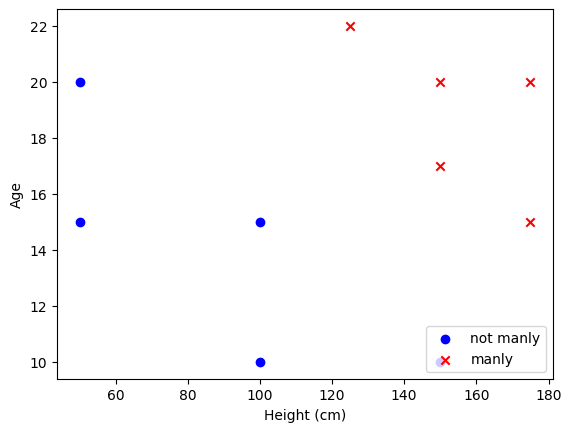

In [3]:
# Scatter plot the training data.

group0 = trainingFeatures[trainingResults == 0]
group1 = trainingFeatures[trainingResults == 1]

plt.scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
plt.scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

plt.ylabel('Age')
plt.xlabel('Height (cm)')
plt.legend(loc='lower right')

plt.show()

In [4]:
# Define sigmoid function.

def sigmoid(z):
    # input :
    # z [scalar] - Parameter for the sigmoid function.
    # returns :
    # [scalar] - Result of sigmoid function.
    
    return 1 / (1 + np.exp(-1 * z))

In [5]:
# Test the sigmoid.

print(f'{sigmoid(0)}')
print(f'{sigmoid(1)}')
print(f'{sigmoid(-1)}')
print(f'{sigmoid(0.5)}')
print(f'{sigmoid(2)}')
print(f'{sigmoid(-2)}')
print(f'{sigmoid(5555)}')
print(f'{sigmoid(-5555)}')

0.5
0.7310585786300049
0.2689414213699951
0.6224593312018546
0.8807970779778823
0.11920292202211755
1.0
0.0


In [6]:
# Define prediction function.

def predict(X, w, b):
    # input :
    # X [ndarray : Shape(n,)] - Data with n features to predict result for.
    # w [ndarray : Shape(n,)] - Weights with n values required for proper prediction.
    # b [scalar] - Bias required for proper prediction.
    # returns:
    # [scalar] - Predicted outcome (chance for true).
    
    dotPlusb = np.dot(X, w) + b
    pred = sigmoid(dotPlusb)
    
    return pred

In [7]:
# Test prediciton with some random weights and bias.

print(f'{predict([19, 177], [0.888, 0.111], 1.5)}')
print(f'{predict([10, 122], [0.888, 0.111], 1.5)}')

1.0
0.9999999999591862


In [8]:
# Define loss function.

def loss(x, w, b, y):
    # input :
    # x [ndarray : Shape(n,)] - Data with n features to predict loss for.
    # w [ndarray : Shape(n,)] - Weights with n values used in finding loss for this given x data.
    # b [scalar] - Bias used in finding loss for this given x data.
    # y [scalar] - Proper result needed for calculating loss for given x.
    # returns:
    # [scalar] - Amount of loss for given x with given w and b.
    
    return (-1 * y * np.log(predict(x, w, b))) - ((1 - y) * np.log(1 - predict(x, w, b)))

In [9]:
# Test loss with some random weights and bias.

print(f'{loss([20, 200], [0.888, 0.111], 1.5, 1.0)}')

nan


In [10]:
# Define cost function.
# It's just a sum of losses divided by number of training examples.
# It's goal is to find how bad are the given weights and bias.

def compute_cost(X, w, b, Y):
    # input :
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns:
    # [scalar] - Cost for given weights and bias.
    
    # Get number of examples.
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        cost += loss(X[i], w, b, Y[i])
        
    cost /= m
    
    return cost

In [11]:
# Test cost with some random weights and bias.

print(f'{compute_cost(trainingFeatures, [0.5, 0.5], 2.5, trainingResults)}')

nan


In [12]:
# Define gradient computation.

def compute_gradient(X, w, b, Y):
    # input:
    # X [ndarray : Shape(m,n)] - Training data.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # returns: 
    # dj_dw [ndarray : Shape(n,)] - Gradient of current weights.
    # dj_db [scalar] - Gradient of current bias.
    
    # Get the shape of training data.
    m,n = X.shape
    
    # Init n weights with zeros.
    dj_dw = np.zeros((n,))
    
    # Init bias with 0.
    dj_db = 0
    
    # Loop over all examples.
    for i in range(m):
        
        err = predict(X[i], w, b) - Y[i]
        
        # Loop over all features.
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
            
        dj_db += err
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db
    

In [13]:
# Test single gradient with some random weights and bias.

print(f'{compute_gradient(trainingFeatures, [1.0, 1.0], 1.0, trainingResults)}')

(array([ 7., 45.]), 0.5)


In [14]:
# Define training function.

def train_logistic_regression(X, Y, w_start, b_start, alpha, num_iter):
    # inputs:
    # X [ndarray : Shape(m,n)] - Training data.
    # Y [ndarray : Shape(m)] - Results for the training data.
    # w_start [ndarray : Shape(n,)] - Starting weights.
    # b_start [scalar] - Starting bias.
    # alpha [scalar] - Step size.
    # num_iter [scalar] - Number of iterations.
    # returns:
    # weights [ndarray : Shape(n,)] - Trained weights for n-features.
    # bias [scalar] - Trained bias.
    # cost_history [ndarray : Shape(num_iter,)] - History of cost during training.
    
    weights = copy.deepcopy(w_start)
    bias = b_start
    cost_history = np.zeros((num_iter,))
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(X, weights, bias, Y)
        
        weights = weights - alpha * dj_dw
        bias = bias - alpha * dj_db
        cost_history[i] = compute_cost(X, weights, bias, Y)
        
        if(i % 100 == 0):
            print(f'Cost at iteration {i} : {cost_history[i]}')
    
    return weights, bias, cost_history
    

In [15]:
# Do the training.

trained_weights, trained_bias, cost_history = train_logistic_regression(trainingFeatures, trainingResults, [1.0, 1.0], 1.0, 0.0005, 3000)

print(f'found weights: {trained_weights}, found bias: {trained_bias}')

Cost at iteration 0 : nan
Cost at iteration 100 : 2.7509453436936737
Cost at iteration 200 : 2.2881226830935617
Cost at iteration 300 : 1.8500144829833065
Cost at iteration 400 : 1.4543071071456972
Cost at iteration 500 : 1.1287314268896362
Cost at iteration 600 : 0.9055829334369072
Cost at iteration 700 : 0.790473745732716
Cost at iteration 800 : 0.7445978786982913
Cost at iteration 900 : 0.7280184285608381
Cost at iteration 1000 : 0.7218639229891791
Cost at iteration 1100 : 0.7193459869299043
Cost at iteration 1200 : 0.71812745055168
Cost at iteration 1300 : 0.7173857480593084
Cost at iteration 1400 : 0.7168226984172034
Cost at iteration 1500 : 0.716327647207283
Cost at iteration 1600 : 0.7158588570376918
Cost at iteration 1700 : 0.7154004154952784
Cost at iteration 1800 : 0.714946214056153
Cost at iteration 1900 : 0.7144938974696027
Cost at iteration 2000 : 0.7140425550733764
Cost at iteration 2100 : 0.7135918340791932
Cost at iteration 2200 : 0.7131415975889743
Cost at iteration 23

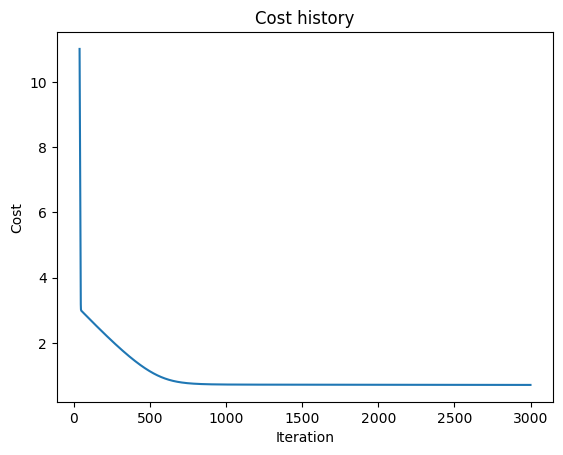

In [16]:
# Plot the cost history.

x = np.arange(cost_history.shape[0])

plt.plot(x, cost_history)

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost history')

plt.show()

In [17]:
# Predict results for training data.

m = trainingFeatures.shape[0]
predictions = np.zeros((m,))

for i in range(m):
    predictions[i] = predict(trainingFeatures[i], trained_weights, trained_bias)
    print(f'prediction for age ({trainingFeatures[i,0]}) and height ({trainingFeatures[i,1]}cm) : {predictions[i]}')    



prediction for age (15) and height (50cm) : 0.44335399052232277
prediction for age (20) and height (50cm) : 0.3196328562654062
prediction for age (10) and height (100cm) : 0.6992905931538698
prediction for age (10) and height (150cm) : 0.8001938596952937
prediction for age (15) and height (100cm) : 0.5783548280447195
prediction for age (15) and height (175cm) : 0.756097181959957
prediction for age (17) and height (150cm) : 0.6566607321829842
prediction for age (20) and height (150cm) : 0.5821752110264454
prediction for age (20) and height (175cm) : 0.6464569805358468
prediction for age (22) and height (125cm) : 0.4622613183429853


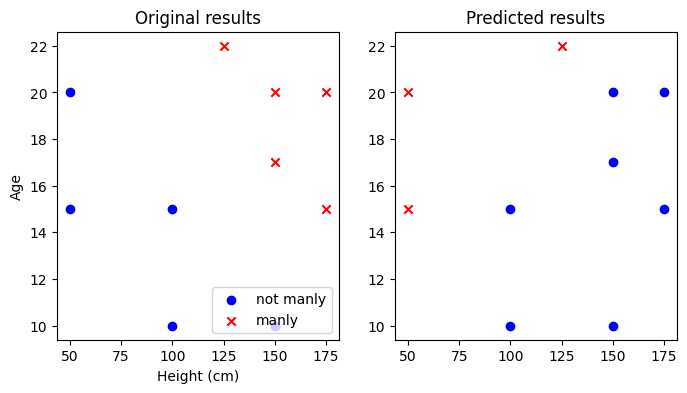

In [18]:
# Scatter original data and predictions next to each other.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Scatter plot the training data.

group0 = trainingFeatures[trainingResults == 0]
group1 = trainingFeatures[trainingResults == 1]

axs[0].scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
axs[0].scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

axs[0].set_ylabel('Age')
axs[0].set_xlabel('Height (cm)')
axs[0].legend(loc='lower right')
axs[0].set_title('Original results')

# Scatter plot the predicted results.

group0 = trainingFeatures[predictions >= 0.5]
group1 = trainingFeatures[predictions < 0.5]

axs[1].scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
axs[1].scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

axs[1].set_title('Predicted results')

plt.show()

In [19]:
# In the 3rd try let's try and use same training examples as in Coursera.

In [20]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [21]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

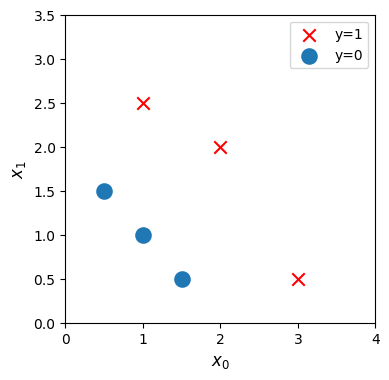

In [22]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [23]:
# Do the training.

trained_weights, trained_bias, cost_history = train_logistic_regression(X_train, y_train, [1.0, 1.0], 1.0, 10.0, 3000)

print(f'found weights: {trained_weights}, found bias: {trained_bias}')

Cost at iteration 0 : 8.596224389766366
Cost at iteration 100 : 0.00882421895215474
Cost at iteration 200 : 0.005799802699811871
Cost at iteration 300 : 0.004319799499599948
Cost at iteration 400 : 0.0034418139298410927
Cost at iteration 500 : 0.0028605775360561227
Cost at iteration 600 : 0.0024473758629678065
Cost at iteration 700 : 0.00213853365816323
Cost at iteration 800 : 0.0018989415771471648
Cost at iteration 900 : 0.0017076522587884289
Cost at iteration 1000 : 0.0015513936049640243
Cost at iteration 1100 : 0.0014213482981767528
Cost at iteration 1200 : 0.0013114293565087611
Cost at iteration 1300 : 0.0012172991866006844
Cost at iteration 1400 : 0.0011357832147089351
Cost at iteration 1500 : 0.001064504558133232
Cost at iteration 1600 : 0.0010016482699105168
Cost at iteration 1700 : 0.0009458045321998238
Cost at iteration 1800 : 0.0008958615838389012
Cost at iteration 1900 : 0.0008509309024499279
Cost at iteration 2000 : 0.0008102938469585344
Cost at iteration 2100 : 0.000773362

In [24]:
m = X_train.shape[0]
predictions = np.zeros((m,))

for i in range(m):
    predictions[i] = predict(X_train[i], trained_weights, trained_bias)
    print(f'prediction for x0 ({X_train[i,0]}) and x1 ({X_train[i,1]}) : {predictions[i]}')    

prediction for x0 (0.5) and x1 (1.5) : 0.0006011739160316508
prediction for x0 (1.0) and x1 (1.0) : 0.0006646229203646548
prediction for x0 (1.5) and x1 (0.5) : 0.0007347635263635852
prediction for x0 (3.0) and x1 (0.5) : 0.9994847293332988
prediction for x0 (2.0) and x1 (2.0) : 0.9999949575604825
prediction for x0 (1.0) and x1 (2.5) : 0.9992302745007959


In [25]:
# We can clearly see, that a different dataset behaves correctly, meaning there is no bug in the code.
# There could be some other feature that i need to utilize. Maybe here my issue is the differences in magnitudes of numbers? Age being small number, height being big number?

In [26]:
# Let's try Scikit-Learn on my example.

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(trainingFeatures, trainingResults)

LogisticRegression()

In [28]:
y_pred = lr_model.predict(trainingFeatures)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 0 0 1 1 1 1 1]


In [29]:
print("Accuracy on training set:", lr_model.score(trainingFeatures, trainingResults))

Accuracy on training set: 1.0


In [30]:
# Scikit-Learn ideally managed to figure out my dataset. That means I definitely have to utilize some unknown to me feature. Let's keep watching Coursera.

In [31]:
# Let's try and define Z-score normalization, and see if it helps to train the model.

In [32]:
def z_score_normalization(X):
    # params:
    # X [ndarray : Shape (n, m)] - Training dataset with multiple features.
    # returns:
    # X_norm [ndarray : Shape (n, m)] - Z-score normalized dataset.
    
    # Find mu and sigma.
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    # Use mu and sigma to do a element-based calculations to normalize whole dataset.
    X_norm = (X - mu) / sigma
    
    return X_norm

In [47]:
# Do the training.

trained_weights, trained_bias, cost_history = train_logistic_regression(z_score_normalization(trainingFeatures), trainingResults, [1.0, 1.0], 1.0, 5.0, 5000)

print(f'found weights: {trained_weights}, found bias: {trained_bias}')

Cost at iteration 0 : 0.12362318130924518
Cost at iteration 100 : 0.004879599813351004
Cost at iteration 200 : 0.00255211313072891
Cost at iteration 300 : 0.001733672273904446
Cost at iteration 400 : 0.001314434348999067
Cost at iteration 500 : 0.0010591998312457548
Cost at iteration 600 : 0.0008873347282317859
Cost at iteration 700 : 0.0007636632013517456
Cost at iteration 800 : 0.000670374865334879
Cost at iteration 900 : 0.000597480371371527
Cost at iteration 1000 : 0.0005389407259274166
Cost at iteration 1100 : 0.0004908891600384337
Cost at iteration 1200 : 0.00045073448243126675
Cost at iteration 1300 : 0.00041667487177899027
Cost at iteration 1400 : 0.0003874183933730146
Cost at iteration 1500 : 0.0003620144535253661
Cost at iteration 1600 : 0.00033974799031906357
Cost at iteration 1700 : 0.0003200707405546331
Cost at iteration 1800 : 0.00030255525791591045
Cost at iteration 1900 : 0.000286863353237663
Cost at iteration 2000 : 0.00027272394017746447
Cost at iteration 2100 : 0.000

In [53]:
# Predict results for training data.

trainingFeatures_normalized = z_score_normalization(trainingFeatures)
m = trainingFeatures_normalized.shape[0]
predictions = np.zeros((m,))

for i in range(m):
    predictions[i] = predict(trainingFeatures_normalized[i], trained_weights, trained_bias)
    print(f'prediction for age ({trainingFeatures[i,0]}) and height ({trainingFeatures[i,1]}cm) : {predictions[i]}')    

prediction for age (15) and height (50cm) : 1.1705875850346714e-09
prediction for age (20) and height (50cm) : 0.00010076123739184836
prediction for age (10) and height (100cm) : 1.9435159004721872e-09
prediction for age (10) and height (150cm) : 0.00027770583233407964
prediction for age (15) and height (100cm) : 0.00016728183483644113
prediction for age (15) and height (175cm) : 0.999889400226327
prediction for age (17) and height (150cm) : 0.9995561922170834
prediction for age (20) and height (150cm) : 0.999999514233585
prediction for age (20) and height (175cm) : 0.9999999987151011
prediction for age (22) and height (125cm) : 0.9999980501002863


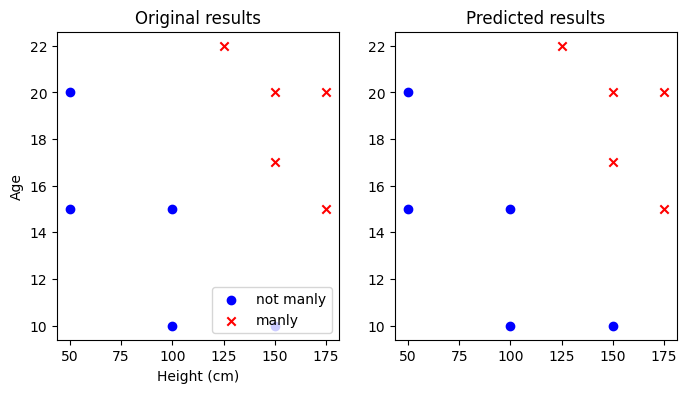

In [55]:
# Scatter original data and predictions after normalization next to each other.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Scatter plot the training data.

group0 = trainingFeatures[trainingResults == 0]
group1 = trainingFeatures[trainingResults == 1]

axs[0].scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
axs[0].scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

axs[0].set_ylabel('Age')
axs[0].set_xlabel('Height (cm)')
axs[0].legend(loc='lower right')
axs[0].set_title('Original results')

# Scatter plot the predicted results.

group0 = trainingFeatures[predictions < 0.5]
group1 = trainingFeatures[predictions >= 0.5]

axs[1].scatter(group0[:, 1], group0[:, 0], c='b', marker='o', label='not manly')
axs[1].scatter(group1[:, 1], group1[:, 0], c='r', marker='x', label='manly')

axs[1].set_title('Predicted results')

plt.show()

In [56]:
# It seems normalization helped alot. Let's try to predict something new now.

In [57]:
# Predict results for new data.
newData =         np.array([[11, 35],
                            [13, 75],
                            [15, 199],
                            [17, 120],
                            [20, 160],
                            [10, 133],
                            [17, 211],
                            [18, 176],
                            [12, 176],
                            [4, 176]])

newData_normalized = z_score_normalization(newData)
m = newData_normalized.shape[0]
predictions = np.zeros((m,))

for i in range(m):
    predictions[i] = predict(newData_normalized[i], trained_weights, trained_bias)
    print(f'prediction for age ({newData[i,0]}) and height ({newData[i,1]}cm) : {predictions[i]}')    

prediction for age (11) and height (35cm) : 1.159238754300551e-12
prediction for age (13) and height (75cm) : 1.7265591852593292e-07
prediction for age (15) and height (199cm) : 0.9999974016847759
prediction for age (17) and height (120cm) : 0.7968526419549726
prediction for age (20) and height (160cm) : 0.9999997733888714
prediction for age (10) and height (133cm) : 3.605651073185142e-05
prediction for age (17) and height (211cm) : 0.9999999957007775
prediction for age (18) and height (176cm) : 0.9999994442512155
prediction for age (12) and height (176cm) : 0.9064426036774581
prediction for age (4) and height (176cm) : 9.143582326103055e-07


In [58]:
# Nice.